# **Filtering Colors**

**In this lesson we'll learn:**
1. How to use the HSV Color Space to Filter by Color

**Remember The HSV Color Space**

![](https://answers.opencv.org/upfiles/15186766673210035.png)

- Hue: 0 - 179 
- Saturation: 0 - 255
- Value (Intensity): 0 - 255

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(image = None, title="", size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()



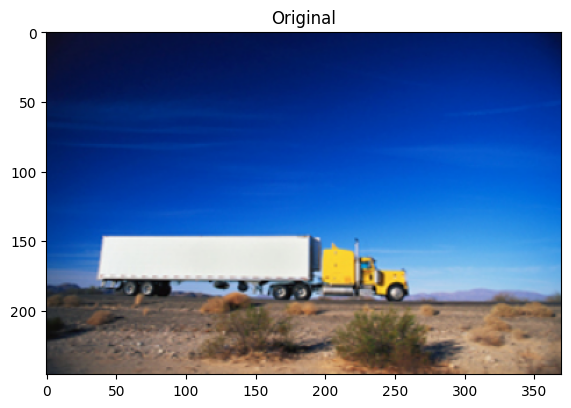

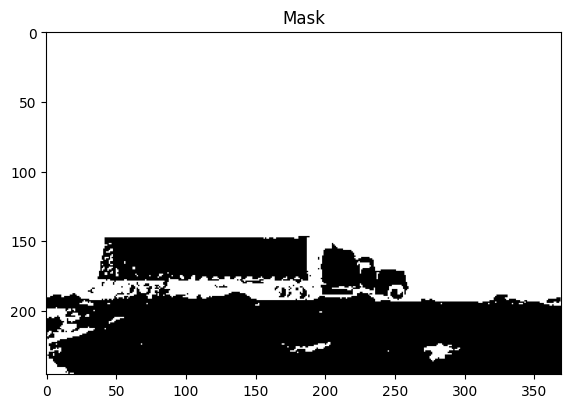

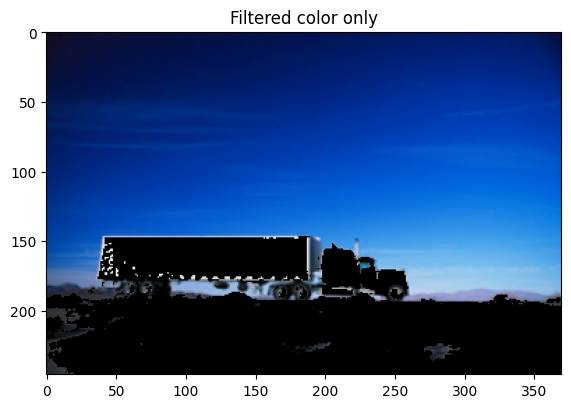

In [74]:
image= cv2.imread('images/truck.png')
imshow(image, 'Original')

# define range of BLUE color in HSV
lower= np.array([90,0,0])
upper= np.array([135,255,255])

# Convert image from RBG/BGR to HSV so we easily filter
hsv_image= cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Use inRange to capture only the values between lower & upper 
mask= cv2.inRange(hsv_image, lower, upper)
imshow(mask, 'Mask')

# Perform Bitwise AND on mask and our original frame
result= cv2.bitwise_and(image, image, mask=mask)
imshow(result, 'Filtered color only')

In [10]:
image.shape, image[0, :5]

((246, 370, 3),
 array([[27, 13, 15],
        [27, 13, 15],
        [29, 13, 16],
        [30, 15, 16],
        [30, 15, 14]], dtype=uint8))

In [11]:
 hsv_image.shape, hsv_image[0, :5]

((246, 370, 3),
 array([[124, 132,  27],
        [124, 132,  27],
        [126, 141,  29],
        [122, 128,  30],
        [118, 136,  30]], dtype=uint8))

In [12]:
mask.shape, mask[0, :5]

((246, 370), array([255, 255, 255, 255, 255], dtype=uint8))

In [34]:
result.shape, result[0, :5]

((246, 370, 3),
 array([[27, 13, 15],
        [27, 13, 15],
        [29, 13, 16],
        [30, 15, 16],
        [30, 15, 14]], dtype=uint8))

#### **Filtering out Red**


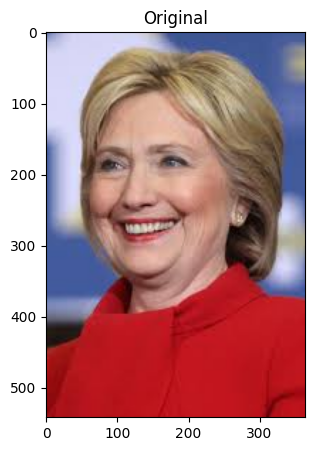

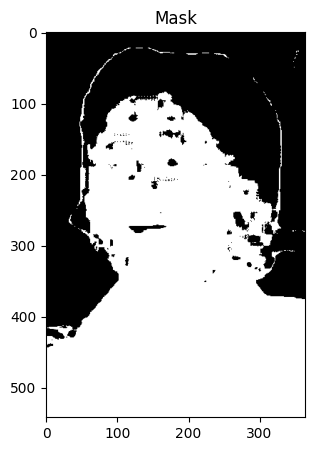

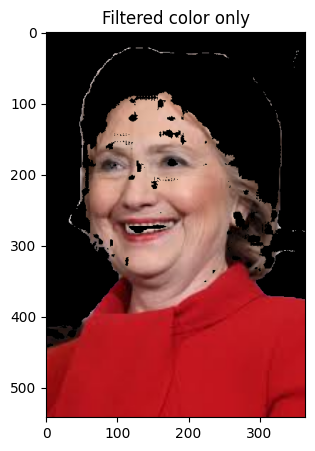

In [79]:
image= cv2.imread('images/hillary.png')
imshow(image, 'Original', 5)
hsv_image= cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# lower mask (0-10)
lower_red= np.array([0,0,0])
upper_red= np.array([10,255,255])
mask_0=cv2.inRange(hsv_image, lower_red, upper_red)

# upper mask (170-180)
lower_red= np.array([170,0,0])
upper_red= np.array([180,255,255])
mask_1=cv2.inRange(hsv_image, lower_red, upper_red)

# join masks
mask= mask_0+mask_1
imshow(mask, 'Mask', 5)

# Perform Bitwise AND on mask and our original frame
result= cv2.bitwise_and(image, image, mask=mask)
imshow(result, "Filtered color only", 5)

In [46]:
mask_0.shape, mask_1.shape, mask.shape

((542, 365), (542, 365), (542, 365))

In [59]:
mask_0[350, 200:215], mask_1[350, 200:215], mask[350, 200:215]

(array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255], dtype=uint8),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8),
 array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255], dtype=uint8))